# NAIVE BAYES CLASSIFIER

## Understand the data

### Census Income Dataset
Census Income dataset is to predict whether the income of a person is greater than 50K per year or less. The data was collected by Barry Becker from 1994 Census dataset.

This dataset was contributed to UCI repository, and It’s openly available at this link - https://archive.ics.uci.edu/ml/datasets/Adult. The dataset consists of 15 columns of a mix of discrete as well as continuous data.

### Data dictionary

#### X variables
* age
* workclass
* fnlwgt
* education
* education-num
* marital-status
* occupation
* relationship
* race
* sex
* capital-gain
* capital-loss
* hours-per-week
* native-country

# Y variable
* annual income


## Implement the model using Python

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

% matplotlib inline

UsageError: Line magic function `%` not found.


#### Load Pima Dataset

In [3]:
df=pd.read_csv('census.csv')
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Annual income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,less_than_50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,less_than_50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,less_than_50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,less_than_50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,less_than_50K


#### NO OF Rows and Columns in the data

In [4]:
df.shape

(32561, 15)

#### Summary of the data

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### check to if DATA is in which Form Numeric or Categorical?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
Annual income     32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Check if any Null values?

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Annual income     0
dtype: int64

#### NO Null Values in the data

#### Grouping Based On Outcome

In [8]:
#Proportion of Y variable
df['Annual income'].value_counts()

less_than_50K       24720
greater_than_50K     7841
Name: Annual income, dtype: int64

In [9]:
#Proportion of Y variable
df['native-country'].value_counts(normalize=True)

 United-States                 0.895857
 Mexico                        0.019748
 ?                             0.017905
 Philippines                   0.006081
 Germany                       0.004207
 Canada                        0.003716
 Puerto-Rico                   0.003501
 El-Salvador                   0.003255
 India                         0.003071
 Cuba                          0.002918
 England                       0.002764
 Jamaica                       0.002488
 South                         0.002457
 China                         0.002303
 Italy                         0.002242
 Dominican-Republic            0.002150
 Vietnam                       0.002058
 Guatemala                     0.001966
 Japan                         0.001904
 Poland                        0.001843
 Columbia                      0.001812
 Taiwan                        0.001566
 Haiti                         0.001351
 Iran                          0.001321
 Portugal                      0.001136


In [10]:
df = df.drop(['native-country'], axis=True)

In [11]:
#Group numerical variables by mean
df.groupby("Annual income").mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
Annual income,,,,,,
greater_than_50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026
less_than_50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210


### Histogram on the Data

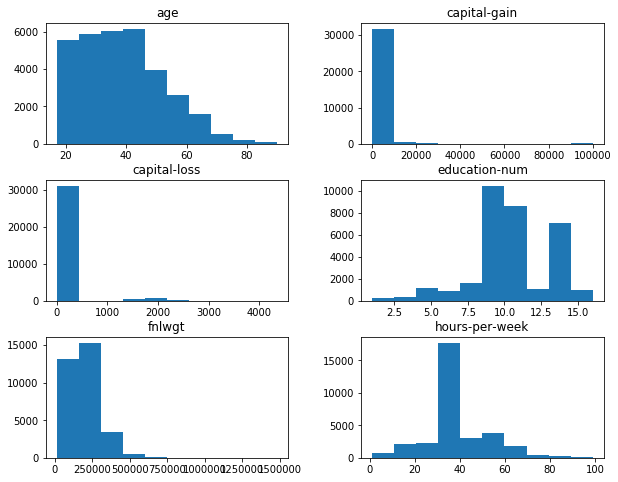

In [12]:
df.hist(figsize=(10,8), grid=False)
plt.show()

#### BOXPLOT on the data (Outlier Detection)

age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
fnlwgt            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
education-num     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
capital-gain         AxesSubplot(0.125,0.391471;0.227941x0.222059)
capital-loss      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
hours-per-week    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

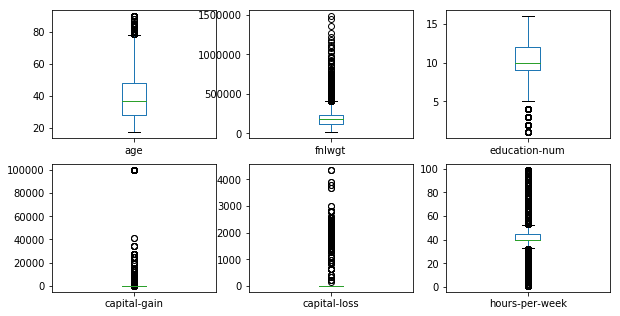

In [13]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

#### Correlation Matrix of Variables using HeatMap

#### Featues

In [14]:
#Create dataframes for X and Y variables
x = df.drop(["Annual income"], axis=1)
y = df[['Annual income']]


In [18]:
##Convert x to dummy variables
x=pd.get_dummies(x, drop_first=True)
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 1 columns):
Annual income    32561 non-null object
dtypes: object(1)
memory usage: 254.5+ KB


In [20]:
##Train test split
from sklearn.model_selection import train_test_split
seed = 7
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 123)

#### Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc=StandardScaler()

In [23]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


array([[ 1.20215142,  0.03598027, -0.4221802 , ..., -0.09192907,
         0.41233546,  0.70192423],
       [ 0.7622001 , -0.59887614,  1.1244454 , ..., -0.09192907,
         0.41233546,  0.70192423],
       [-0.48432865, -0.66254805,  1.1244454 , ..., -0.09192907,
         0.41233546,  0.70192423],
       ...,
       [-1.43755652, -1.4444482 , -0.4221802 , ..., -0.09192907,
         0.41233546,  0.70192423],
       [-1.14425564, -1.29417759, -0.4221802 , ..., -0.09192907,
         0.41233546,  0.70192423],
       [-1.43755652, -0.14178931, -0.4221802 , ..., -0.09192907,
         0.41233546, -1.4246552 ]])

#### Classifier Invoking

In [24]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)


C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
y_pred_G = classifier.predict(X_test)
y_pred_G

array(['greater_than_50K', 'greater_than_50K', 'greater_than_50K', ...,
       'greater_than_50K', 'less_than_50K', 'greater_than_50K'],
      dtype='<U16')

#### Evaluation Metrics

In [26]:
cm_G = confusion_matrix(y_test, y_pred_G)
cm_G

array([[2276,   85],
       [4549, 2859]], dtype=int64)

In [27]:
from sklearn.naive_bayes import BernoulliNB

optimal_alpha = 1
NB_optimal = BernoulliNB(alpha=optimal_alpha)

# fitting the model
NB_optimal.fit(X_train, y_train)

C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1, binarize=0.0, class_prior=None, fit_prior=True)

In [28]:
y_pred_B = NB_optimal.predict(X_test)
y_pred_B

array(['greater_than_50K', 'greater_than_50K', 'less_than_50K', ...,
       'less_than_50K', 'less_than_50K', 'greater_than_50K'], dtype='<U16')

In [29]:
topn_class2 = sorted(zip(NB_optimal.feature_count_[1], x.columns),reverse=True)[:12]
topn_class2

[(14524.0, 'race_ White'),
 (12383.0, 'workclass_ Private'),
 (10630.0, 'sex_ Male'),
 (7634.0, 'fnlwgt'),
 (7133.0, 'marital-status_ Never-married'),
 (6850.0, 'age'),
 (6112.0, 'education_ HS-grad'),
 (5810.0, 'marital-status_ Married-civ-spouse'),
 (5191.0, 'relationship_ Not-in-family'),
 (4262.0, 'education-num'),
 (4128.0, 'education_ Some-college'),
 (4040.0, 'hours-per-week')]

In [30]:
topn_class1 = sorted(zip(NB_optimal.feature_count_[0], x.columns),reverse=True)[:12]
topn_class1

[(4956.0, 'race_ White'),
 (4702.0, 'marital-status_ Married-civ-spouse'),
 (4639.0, 'sex_ Male'),
 (3716.0, 'age'),
 (3439.0, 'workclass_ Private'),
 (3185.0, 'education-num'),
 (2662.0, 'hours-per-week'),
 (2326.0, 'fnlwgt'),
 (1552.0, 'education_ Bachelors'),
 (1394.0, 'occupation_ Exec-managerial'),
 (1294.0, 'occupation_ Prof-specialty'),
 (1173.0, 'education_ HS-grad')]

In [31]:
cm_G = confusion_matrix(y_test, y_pred_G)
cm_B = confusion_matrix(y_test, y_pred_B)

print(cm_G)
print(cm_B)

[[2276   85]
 [4549 2859]]
[[1689  672]
 [1116 6292]]


In [32]:
print(accuracy_score(y_test, y_pred_G))
print(accuracy_score(y_test, y_pred_B))

0.5256423380079844
0.8169720544579793


In [46]:
# store the predicted probabilities for class 1
y_pred_prob = NB_optimal.predict_proba(X_test)[:, 1]
y_pred_prob[1:20]

array([9.21266566e-01, 4.17641047e-04, 9.96438541e-01, 3.02888021e-03,
       3.18454795e-04, 9.79604279e-01, 3.13680928e-01, 4.34693158e-04,
       1.07384566e-01, 4.86863059e-04, 8.06242798e-03, 9.53545369e-01,
       8.35804053e-01, 8.45621990e-01, 1.95334584e-01, 2.47265296e-04,
       2.52406096e-04, 9.98817459e-01, 2.45194857e-05])

In [57]:
y_scores = NB_optimal.predict_proba(X_test)[:, 1]

In [58]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [59]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    
   

In [63]:
precision_recall_threshold(p, r, thresholds, 0.45)

     pred_neg  pred_pos
neg      6165      1243
pos       594      1767


In [64]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

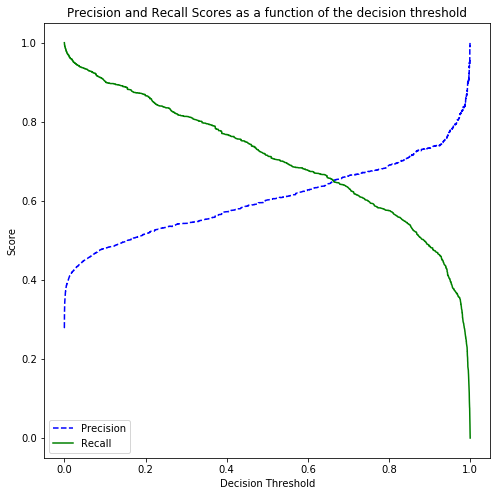

In [65]:
# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(p, r, thresholds)